#Abstract
A lot of problems in science and engineering become easier when performed in a Fourier domain. In this particular assignment we consider separation of noise from original signal. We have three input parameters: number of periods, number of points within a period and the amplitude of a noise. It was found that with the increase of number of periods and points the recovered function becomes more accurate, and with the increase of amplitude it becomes less accurate. 

#Introduction

In this assignment we have an original function: $y(t)=sin(\frac{2\pi t}{T})$ on interval $(-1,1)$ where $T=1 s$

Then we add some randomly generated noise to it and try to recover it using Fourier transform. 

We have the following parameters:

* n_0 = number of equidistant points within a period
* n_p = number of periods
* A = amplitude of noise

We compare results for the following values of parameters: 

* In parts A-D $n_p=4$, $n_0=32$, $A=0.25$

* In part E $n_p=4$, $n_0=16,8$, $A=0.25$

* In part F $n_p=2,8,16$, $n_0=16,8$, $A=0.25$

* In part G $n_p=4$, $n_0=16,8$, $A=0.1,0.5,1$

#Methodology

$f_n$ is value of function at time $t_n$ and $F_k$ is value of its Fourier transform at frequency $s_k$ 
##Discrete Fourier transform

$$F_k=\sum_{n=0}^{n_0-1}f_ne^{-i2\pi kn/n_0}$$



##Inverse Fourier transform

$$f_n=\frac{1}{n_0}\sum_{n=0}^{n_0-1}F_ke^{i2\pi kn/n_0}$$ 

##Root mean squared

The error is calculated using rms formula: 

$$rms=\sqrt{\frac{\sum_i e_i^2}{n}}$$

Where $e_i$ is a difference between restored signal and original one at a point $t_i$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import uniform

def y(t):
  #input: t=time
  #output: y=the values of original signal
  n=len(t)
  y=np.zeros(n)
  for i in range(n):
    y[i]=np.sin(2*np.pi*t[i])
  return y

def add_noise(y,A):
  #inputs: y=the values of original signal, A=amplitude of noise
  #output: z=sum of original signal and random noise
  n=len(y)
  z=np.zeros(n)
  for i in range(n):
    z[i]=y[i]+uniform(-A,A)
  return z

def fourier(y):
  #inputs: y=the values of original signal
  #output: k=fourier transform of original signal
  n=len(y)
  k=np.zeros(n,dtype=np.complex)
  for i in range(n):
    s=0
    for j in range(n):
      s=s+y[j]*(np.exp(-1j*2*np.pi*i*j/n))
    k[i]=s
  return k
  #inputs: k=the values of frequencies
  #output: y=inverse fourier transform of frequencies
def inverse_fourier(k):
  n=len(k)
  y=np.zeros(n,dtype=np.complex)
  for i in range(n):
    s=0
    for j in range(n):
      s=s+k[j]*(np.exp(1j*2*np.pi*i*j/n))
    y[i]=s
  y=y/n
  return y
      
def graph(n_0,n_p,A):
  #inputs: n_0=number of points in period, n_p=number of period,A=amplitude of noise
  t=np.arange(0,n_p,1/n_0)
  original_signal=y(t)
  noisy_signal=add_noise(original_signal,A)
  noisy_frequency=fourier(noisy_signal)
  restored_frequency=np.zeros(n_p*n_0,dtype=complex)
  #Original function is a sine, which has 2 spikes in frequency domain. 
  #The following block keeps the 2 max frequencies corresponding to original signal and removes others corresponding to the noise
  temp=abs(noisy_frequency)
  s1=temp.argmax()
  temp[s1]=0
  s2=temp.argmax()
  restored_frequency[s1]=noisy_frequency[s1]
  restored_frequency[s2]=noisy_frequency[s2]
  restored_signal=np.real(inverse_fourier(restored_frequency))
  #The followin block graphs signals
  plt.scatter(t,original_signal,label='original signal',s=10)
  plt.scatter(t,noisy_signal,label='noisy signal',s=10)
  plt.scatter(t,restored_signal,label='restored signal',s=10,color='red')
  plt.xlabel('t')
  plt.ylabel('y(t)')
  plt.grid()
  plt.legend()
  plt.show()

def rms(n_0,n_p,A):
  #inputs: n_0=number of points in period, n_p=number of period,A=amplitude of noise
  #output: rms error
  t=np.arange(0,n_p,1/n_0)
  original_signal=y(t)
  noisy_signal=add_noise(original_signal,A)
  noisy_frequency=fourier(noisy_signal)
  restored_frequency=np.zeros(n_p*n_0,dtype=complex)
  #Original function is a sine, which has 2 spikes in frequency domain. 
  #The following block keeps the 2 max frequencies corresponding to original signal and removes others corresponding to the noise
  temp=abs(noisy_frequency)
  s1=temp.argmax()
  temp[s1]=0
  s2=temp.argmax()
  restored_frequency[s1]=noisy_frequency[s1]
  restored_frequency[s2]=noisy_frequency[s2]
  restored_signal=np.real(inverse_fourier(restored_frequency))
  #The following block computes rms of difference between recovered and original signals
  rms=0
  for i in range(n_0):
    rms=rms+(restored_signal[i]-original_signal[i])**2
  rms=np.sqrt(rms/n_0)
  return rms

#Parts A,B,C,D

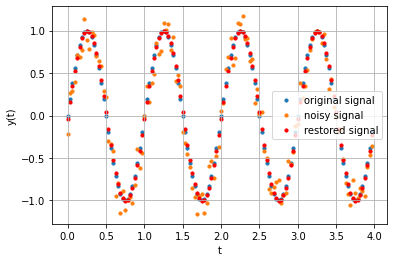

average rms =  0.015728610686096746


In [ ]:
graph(32,4,0.25)
#Due to noise being random, it is necessary to do the computation several times to estimate the average behavior
rms_array=np.zeros(100)
for i in range(100):
  rms_array[i]=rms(32,4,0.25)
print('average rms = ', np.mean(rms_array))

#Part E

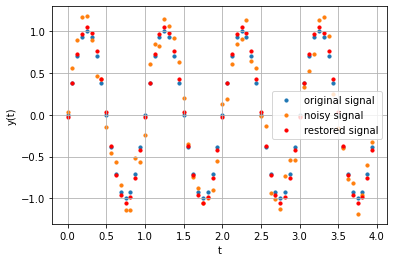

average rms =  0.02278519311657147


In [ ]:
graph(16,4,0.25)
rms_array=np.zeros(100)
for i in range(100):
  rms_array[i]=rms(16,4,0.25)
print('average rms = ', np.mean(rms_array))

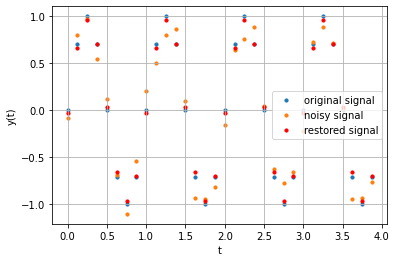

average rms =  0.029370256075571276


In [ ]:
graph(8,4,0.25)
rms_array=np.zeros(100)
for i in range(100):
  rms_array[i]=rms(8,4,0.25)
print('average rms = ', np.mean(rms_array))

#Part F

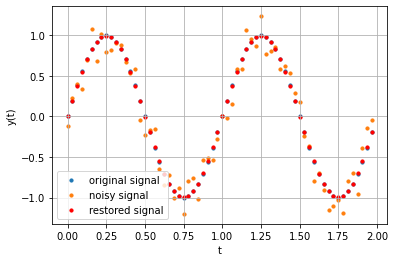

average rms =  0.02138997559484151


In [ ]:
graph(32,2,0.25)
rms_array=np.zeros(100)
for i in range(100):
  rms_array[i]=rms(32,2,0.25)
print('average rms = ', np.mean(rms_array))

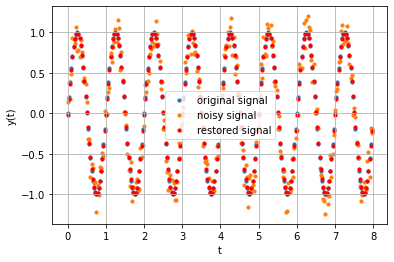

average rms =  0.010973375657253584


In [ ]:
graph(32,8,0.25)
rms_array=np.zeros(100)
for i in range(100):
  rms_array[i]=rms(32,8,0.25)
print('average rms = ', np.mean(rms_array))

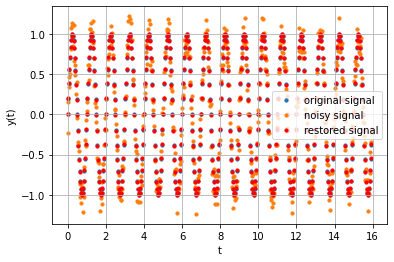

average rms =  0.007332558628276904


In [ ]:
graph(32,16,0.25)
rms_array=np.zeros(100)
for i in range(100):
  rms_array[i]=rms(32,16,0.25)
print('average rms = ', np.mean(rms_array))

#Part G

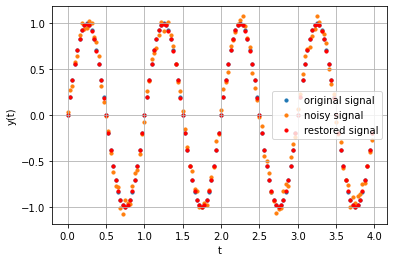

average rms =  0.005946604053262639


In [ ]:
graph(32,4,0.1)
rms_array=np.zeros(100)
for i in range(100):
  rms_array[i]=rms(32,4,0.1)
print('average rms = ', np.mean(rms_array))

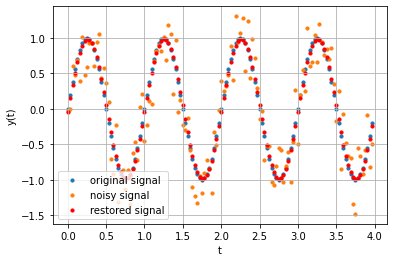

average rms =  0.033120531776351936


In [ ]:
graph(32,4,0.5)
rms_array=np.zeros(100)
for i in range(100):
  rms_array[i]=rms(32,4,0.5)
print('average rms = ', np.mean(rms_array))

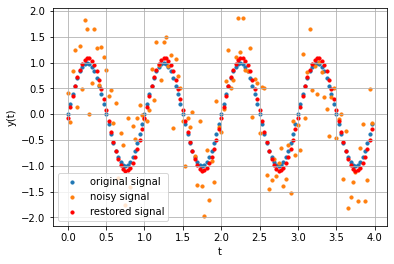

average rms =  0.06490298186276601


In [ ]:
graph(32,4,1)
rms_array=np.zeros(100)
for i in range(100):
  rms_array[i]=rms(32,4,1)
print('average rms = ', np.mean(rms_array))

#Interpeting results

$n_0$|$n_p$|$A$|average rms error
--|--|--|--
32|4|0.25|0.016
16|4|0.25|0.023
8|4|0.25|0.029
32|2|0.25|0.021
32|8|0.25|0.011
32|16|0.25|0.007
32|4|0.1|0.006
32|4|0.5|0.033
32|4|1|0.065

In general we can see that increasing the amount of initial data points(either by increasing the number of periods or by increasing the number of points within one period) decreases the error. This is because with more points it is clearer what the original signal and its frequencies were, and random noises have low effect on it. Also, unsurprisingly when the amplitude ot noise rises it is harder to restore the original signal. Especially when the amplitude of noise is equal to amplitude of the signal or even higher - the error will grow. 

#Conclusion
Overall, the implementation of discrete fourier transform and its inverse achieved its goals - it was possible to separate noise and recover original function with reasonable degree of accuracy.

For further exploration more complicated initial signals(with more than one two frequencies) can be investigated, since then the magnitude of errors may depend differently on number of periods, number of points in period and magnitude of noise.


#References
* Lecture on Fourier transform by Prof. Abdikamalov:
https://www.youtube.com/watch?v=_FFJsZkywRY
* Chapra, S. C., & Canale, R. P. (2011). Numerical methods for engineers
